In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns 
import matplotlib.pyplot as plt

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier

In [2]:
df=pd.read_csv('C:\\Users\\user\\Documents\\Program\\Python\\Dataset\\COVID_19.csv')


C:\Users\user\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3146: DtypeWarning: Columns (1) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [3]:
df.head()


,cdc_report_dt,pos_spec_dt,onset_dt,current_status,sex,age_group,Race and ethnicity (combined),hosp_yn,icu_yn,death_yn,medcond_yn
0,2020/11/10,2020/11/10,NaN,Laboratory-confirmed case,Male,10 - 19 Years,"Black, Non-Hispanic",No,Unknown,No,No
1,2020/11/14,2020/11/10,2020/11/10,Laboratory-confirmed case,Male,10 - 19 Years,"Black, Non-Hispanic",No,No,No,No
2,2020/11/19,2020/11/10,2020/11/09,Laboratory-confirmed case,Male,10 - 19 Years,"Black, Non-Hispanic",No,No,No,No
3,2020/11/14,2020/11/10,NaN,Laboratory-confirmed case,Male,10 - 19 Years,"Black, Non-Hispanic",Missing,Missing,No,Missing
4,2020/11/13,2020/11/10,2020/11/10,Laboratory-confirmed case,Male,10 - 19 Years,"Black, Non-Hispanic",No,No,No,Yes


In [4]:
df.shape

(8405079, 11)

In [5]:
df = df.drop(['pos_spec_dt','onset_dt'],axis =1)

In [6]:
df = df.dropna()

In [7]:
df.isnull().sum()

cdc_report_dt                    0
current_status                   0
sex                              0
age_group                        0
Race and ethnicity (combined)    0
hosp_yn                          0
icu_yn                           0
death_yn                         0
medcond_yn                       0
dtype: int64

In [8]:
df.shape


(8404990, 9)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8404990 entries, 0 to 8405078
Data columns (total 9 columns):
 #   Column                         Dtype 
---  ------                         ----- 
 0   cdc_report_dt                  object
 1   current_status                 object
 2   sex                            object
 3   age_group                      object
 4   Race and ethnicity (combined)  object
 5   hosp_yn                        object
 6   icu_yn                         object
 7   death_yn                       object
 8   medcond_yn                     object
dtypes: object(9)
memory usage: 641.2+ MB


In [10]:
colums = ['current_status', 'sex', 'age_group', 'Race and ethnicity (combined)', 'hosp_yn','icu_yn', 'death_yn', 'medcond_yn']
for col in colums:
    print(col)
    print(df[colums].value_counts())
    print("______________________")

current_status
current_status             sex      age_group      Race and ethnicity (combined)  hosp_yn  icu_yn   death_yn  medcond_yn
Laboratory-confirmed case  Female   20 - 29 Years  Unknown                        Missing  Missing  Missing   Missing       106485
                           Male     20 - 29 Years  Unknown                        Missing  Missing  Missing   Missing       103285
                                    30 - 39 Years  Unknown                        Missing  Missing  Missing   Missing        88420
                           Female   30 - 39 Years  Unknown                        Missing  Missing  Missing   Missing        85402
                                    40 - 49 Years  Unknown                        Missing  Missing  Missing   Missing        79194
                                                                                                                             ...  
                           Unknown  10 - 19 Years  White, Non-Hispanic        

current_status             sex      age_group      Race and ethnicity (combined)  hosp_yn  icu_yn   death_yn  medcond_yn
Laboratory-confirmed case  Female   20 - 29 Years  Unknown                        Missing  Missing  Missing   Missing       106485
                           Male     20 - 29 Years  Unknown                        Missing  Missing  Missing   Missing       103285
                                    30 - 39 Years  Unknown                        Missing  Missing  Missing   Missing        88420
                           Female   30 - 39 Years  Unknown                        Missing  Missing  Missing   Missing        85402
                                    40 - 49 Years  Unknown                        Missing  Missing  Missing   Missing        79194
                                                                                                                             ...  
                           Unknown  10 - 19 Years  White, Non-Hispanic            No       No

In [11]:
df.describe().T

,count,unique,top,freq
cdc_report_dt,8404990,321,2020/06/24,155856
current_status,8404990,2,Laboratory-confirmed case,7910037
sex,8404990,5,Female,4340898
age_group,8404990,10,20 - 29 Years,1635264
Race and ethnicity (combined),8404990,9,Unknown,2781165
hosp_yn,8404990,4,No,3502508
icu_yn,8404990,4,Missing,6178240
death_yn,8404990,4,No,3690765
medcond_yn,8404990,4,Missing,6063360


In [12]:
df.nunique()

cdc_report_dt                    321
current_status                     2
sex                                5
age_group                         10
Race and ethnicity (combined)      9
hosp_yn                            4
icu_yn                             4
death_yn                           4
medcond_yn                         4
dtype: int64

<AxesSubplot:title={'center':'medcond_yn '}, ylabel='medcond_yn'>

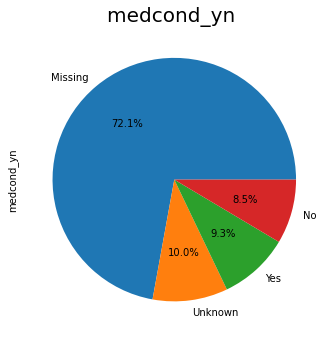

In [13]:
plt.figure(figsize=(30,10))
plt.subplots_adjust(left=0.125, bottom=0.1, right=0.9, top=0.9,
                      wspace=0.5, hspace=0.2)
plt.subplot(141)
plt.title('medcond_yn ',fontsize = 20)
df['medcond_yn'].value_counts().plot.pie(autopct="%1.1f%%")

<AxesSubplot:title={'center':'death_yn'}, ylabel='death_yn'>

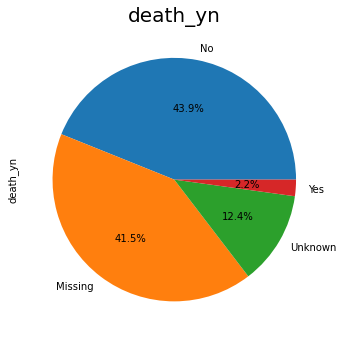

In [14]:
plt.figure(figsize=(30,10))
plt.subplots_adjust(left=0.125, bottom=0.1, right=0.9, top=0.9,
                      wspace=0.5, hspace=0.2)
plt.subplot(141)
plt.title('death_yn',fontsize = 20)
df['death_yn'].value_counts().plot.pie(autopct="%1.1f%%")

<AxesSubplot:title={'center':'hosp_yn'}, ylabel='hosp_yn'>

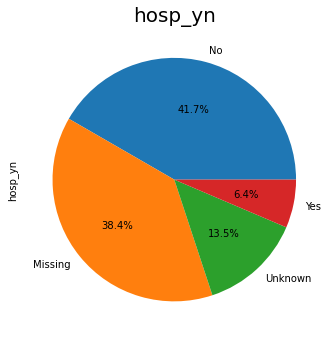

In [15]:
plt.figure(figsize=(30,10))
plt.subplots_adjust(left=0.125, bottom=0.1, right=0.9, top=0.9,
                      wspace=0.5, hspace=0.2)
plt.subplot(141)
plt.title('hosp_yn',fontsize = 20)
df['hosp_yn'].value_counts().plot.pie(autopct="%1.1f%%")

<AxesSubplot:title={'center':'icu_yn'}, ylabel='icu_yn'>

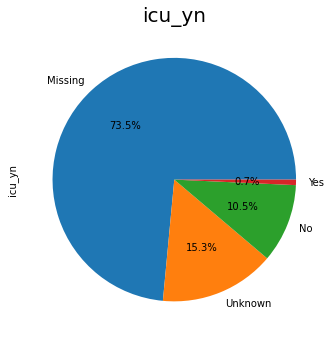

In [16]:
plt.figure(figsize=(30,10))
plt.subplots_adjust(left=0.125, bottom=0.1, right=0.9, top=0.9,
                      wspace=0.5, hspace=0.2)
plt.subplot(141)
plt.title('icu_yn',fontsize = 20)
df['icu_yn'].value_counts().plot.pie(autopct="%1.1f%%")

<AxesSubplot:title={'center':'Race and ethnicity (combined)'}, ylabel='Race and ethnicity (combined)'>

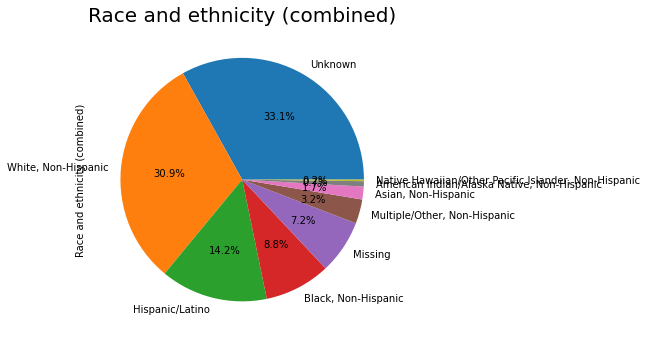

In [17]:
plt.figure(figsize=(30,10))
plt.subplots_adjust(left=0.125, bottom=0.1, right=0.9, top=0.9,wspace=0.5, hspace=0.2)
plt.subplot(141)
plt.title('Race and ethnicity (combined)',fontsize = 20)
df['Race and ethnicity (combined)'].value_counts().plot.pie(autopct="%1.1f%%")

<AxesSubplot:title={'center':'current_status'}, ylabel='current_status'>

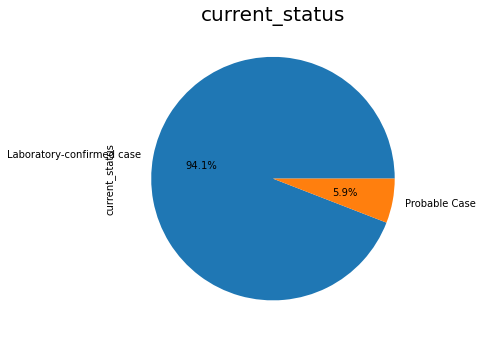

In [18]:
plt.figure(figsize=(30,10))
plt.subplots_adjust(left=0.125, bottom=0.1, right=0.9, top=0.9,
                      wspace=0.5, hspace=0.2)
plt.subplot(141)
plt.title('current_status',fontsize = 20)
df['current_status'].value_counts().plot.pie(autopct="%1.1f%%")

<AxesSubplot:xlabel='count', ylabel='current_status'>

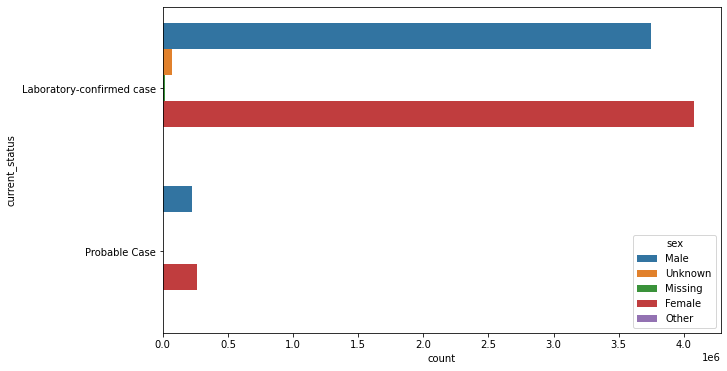

In [19]:
plt.figure(figsize=(10,6))
sns.countplot(y="current_status",hue ='sex',data=df)

<AxesSubplot:xlabel='count', ylabel='medcond_yn'>

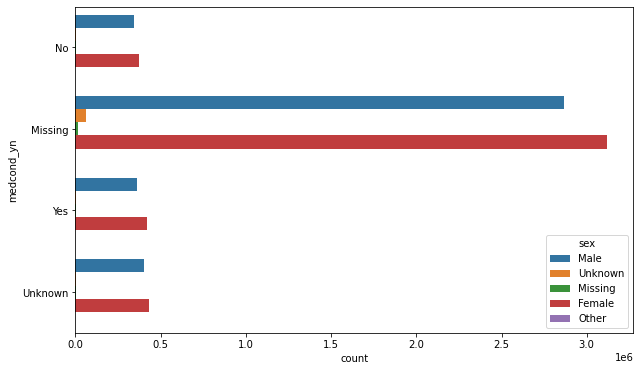

In [20]:
plt.figure(figsize=(10,6))
sns.countplot(y="medcond_yn",hue ='sex',data=df)

<AxesSubplot:xlabel='count', ylabel='death_yn'>

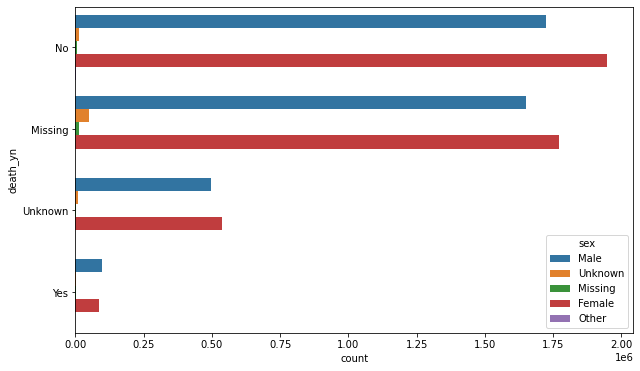

In [21]:
plt.figure(figsize=(10,6))
sns.countplot(y="death_yn",hue ='sex',data=df)

<AxesSubplot:xlabel='count', ylabel='age_group'>

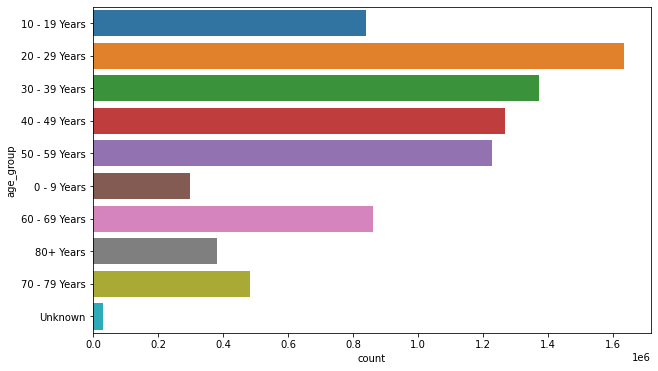

In [22]:
plt.figure(figsize=(10,6))
sns.countplot(y="age_group",data=df)

<AxesSubplot:xlabel='count', ylabel='age_group'>

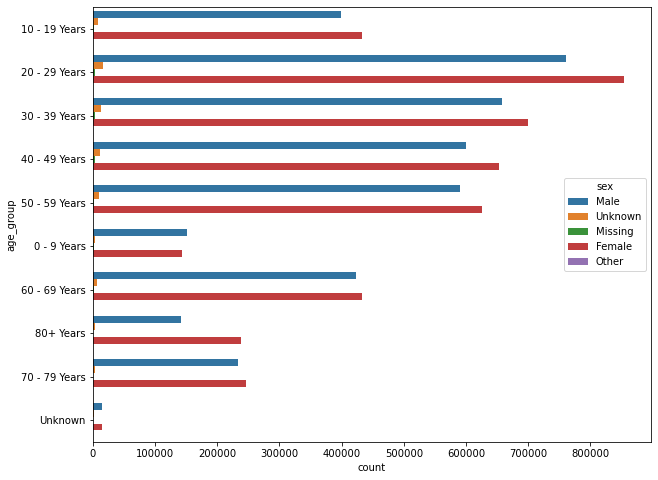

In [23]:
plt.figure(figsize=(10,8))
sns.countplot(y="age_group",hue ='sex',data=df)

<Figure size 720x576 with 0 Axes>

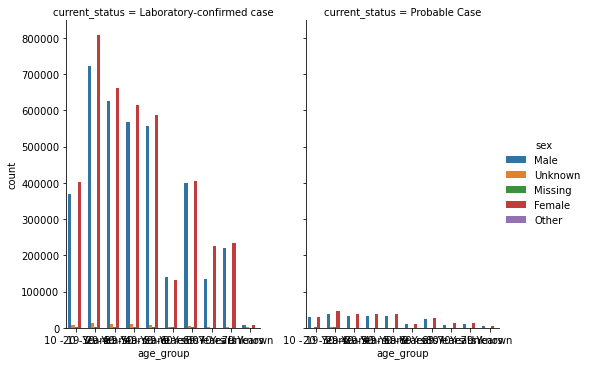

In [24]:
plt.figure(figsize=(10,8))
sns.catplot(x="age_group", hue="sex", col="current_status", data=df, kind="count", height=5, aspect=.7);

In [25]:
print("Start Date:", df['cdc_report_dt'].min())
print("End Date:", df['cdc_report_dt'].max())


Start Date: 2020/01/01
End Date: 2020/11/19


In [26]:
df['age_group'].value_counts()

20 - 29 Years    1635264
30 - 39 Years    1372623
40 - 49 Years    1267350
50 - 59 Years    1227493
60 - 69 Years     863260
10 - 19 Years     841450
70 - 79 Years     483689
80+ Years         382869
0 - 9 Years       299040
Unknown            31952
Name: age_group, dtype: int64

In [27]:
data = df.copy()

In [28]:
data['sex'].value_counts()

Female     4340898
Male       3970591
Unknown      73838
Missing      19508
Other          155
Name: sex, dtype: int64

In [29]:
from sklearn.preprocessing import LabelEncoder

lb_make = LabelEncoder()

In [30]:
# mapp = {'Female':1,'Male':2,'Unknown':3,'Missing':4,'Other':5}
# data['sex'] = data['sex'].apply(lambda x:mapp[x])

data['sex'] = data['sex'].map({'Female':0,'Male':1,'Unknown':2,'Missing':3,'Other':4})
print(data.head())

  cdc_report_dt             current_status  sex      age_group  \
0    2020/11/10  Laboratory-confirmed case    1  10 - 19 Years   
1    2020/11/14  Laboratory-confirmed case    1  10 - 19 Years   
2    2020/11/19  Laboratory-confirmed case    1  10 - 19 Years   
3    2020/11/14  Laboratory-confirmed case    1  10 - 19 Years   
4    2020/11/13  Laboratory-confirmed case    1  10 - 19 Years   

  Race and ethnicity (combined)  hosp_yn   icu_yn death_yn medcond_yn  
0           Black, Non-Hispanic       No  Unknown       No         No  
1           Black, Non-Hispanic       No       No       No         No  
2           Black, Non-Hispanic       No       No       No         No  
3           Black, Non-Hispanic  Missing  Missing       No    Missing  
4           Black, Non-Hispanic       No       No       No        Yes  


In [ ]:
data["current_status"] = lb_make.fit_transform(data["current_status"])
data["hosp_yn"] = lb_make.fit_transform(data["hosp_yn"])
data["icu_yn"] = lb_make.fit_transform(data["icu_yn"])
data["death_yn"] = lb_make.fit_transform(data["death_yn"])
data["medcond_yn"] = lb_make.fit_transform(data["medcond_yn"])

In [ ]:
data.head()


In [ ]:
data.shape


In [ ]:
X =  data[['current_status','hosp_yn','icu_yn','medcond_yn','sex']]
y = data['death_yn']

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [ ]:
# Logistic Regression

logreg = LogisticRegression()
logreg.fit(X_train, y_train)
Y_pred = logreg.predict(X_test)
acc_log = round(logreg.score(X_train, y_train) * 100, 2)
acc_log

In [ ]:
# Decision Tree

decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, y_train)
Y_pred = decision_tree.predict(X_test)
acc_decision_tree = round(decision_tree.score(X_train, y_train) * 100, 2)
acc_decision_tree

In [ ]:
# Random Forest

random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train, Y_train)
Y_pred = random_forest.predict(X_test)
random_forest.score(X_train, Y_train)
acc_random_forest = round(random_forest.score(X_train, Y_train) * 100, 2)
acc_random_forest

In [ ]:
models = pd.DataFrame({
    'Model': ['Logistic Regression', 'Decision Tree', 'Random Forest'],
    'Score': [ acc_log, acc_decision_tree, acc_random_forest]})
sorted_model=models.sort_values(by='Score', ascending=False)
sorted_model

In [ ]:
plt.figure(figsize=(20,10))
fig = plt.bar(sorted_model['Model'], sorted_model['Score'], sorted_model['Model'],color='aqua')
plt.grid()
plt.show()